# Perkenalan

Dibuat Oleh Arry Pandowo, student Full Stack Data Science Batch 01 Hacktiv8 untuk pemenuhan Milestone #02 Phase #01

> ### Data yang digunakan


Data yang digunakan adalah IBM HR Analytics Employee Attrition & Performance dari data [berikut]('https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset') dataset fictional yang dibuat oleh Data Scientist dari IBM sebagai bahan analisis untuk project data scientist.

## Analisis awal Dataset

Attrition merupakan sebuah kondisi dimana tidak terpenuhinya posisi yang kosong ketika seorang karyawan pada posisi tertentu disebuah perusahan meninggalkan posisinya, dikarenakan berbagai penyebab, beberapa diantaranya yaitu :
* karyawan resign dari posisinya
* karyawan dikeluarkan dari posisinya oleh Perusahaan
* karyawan pindah ke posisi lain di internal perusahaan
* Alasan Demografis Attrition (Umur, gender dan ethnicity)

Perusahaan dinilai penting untuk dapat melakukan prediksi Attrition level sebagai bentuk evaluasi. Dataset berikut memiliki 34 Feature dan 1 target yang dapat digunakan sebagai bahan untuk membuat sebuah prediksi model. Prioritas utama dari Analisis ini adalah untuk dapat menebak prediksi yes (Class 1) dan menganalisis penyebab dari Class tersebut

> ### Tujuan yang ingin dicapai


<ol>
<li>melihat hubungan antar feature didalam data, dan menggali insight sebanyak mungkin dari dataset</li>
<li>membuat model prediktif dengan target attrition</li>
<li>mengimplimentasikan praktik semi supervised learning dengan PCA sebagai metode untuk melakukan dimentional reduction dan menentukan metode yang tepat untuk digunakan pada dataset</li>
<ol/>

# Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import  metrics
from sklearn.pipeline import Pipeline

***

# Data Loading

In [2]:
df = pd.read_csv('data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.shape

(1470, 35)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df_numeric = df.select_dtypes(include = ['int64', 'float64'])


df_cat_str  = df.select_dtypes(include = ['object'])
df_ordinal = df_numeric[['Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'EmployeeNumber']]
df_numeric = df_numeric.drop(['EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'Education', 'EmployeeNumber'], axis=1)

> Pemisahan Per kategori data diperlukan untuk analisis lebih lanjut dan proses pengolahan data selanjutnya terutama ketika pelaksanaan Eksplorasi Data

## Checking Label

<AxesSubplot:>

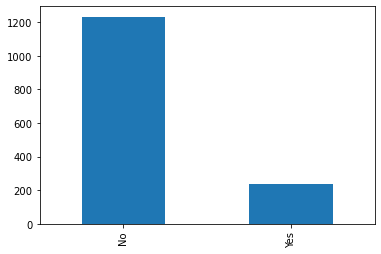

In [7]:
df['Attrition'].value_counts().plot(kind='bar')

Terdapat imbalance label, akan dilakukan proses Oversampling dengan menggunakan SMOTE untuk data X-train yang akan di fit kedalam model

## Skewness Score

### Delete Feature yang tidak dipakai

C:\Users\arryp\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\arryp\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='StandardHours', ylabel='Count'>

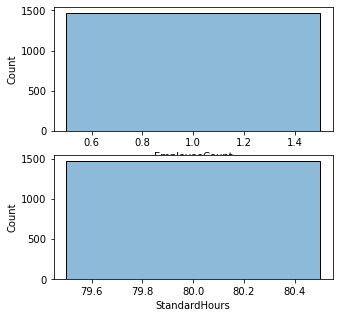

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (5, 5))
sns.histplot(df_numeric['EmployeeCount'], kde=True, ax = ax1)
sns.histplot(df_numeric['StandardHours'], kde=True, ax = ax2)

In [9]:
df_numeric.drop(['StandardHours', 'EmployeeCount'], axis=1, inplace=True)

Skewness score test dilakukan kepada df_numeric yang memiliki variannce diatas 0, artinya bukan data statis sehingga memiliki pergerakan data. 
* Employee Count digunakan sebagai dasar perhitungan total karyawan dengan input data 1 pada setiap baris.
* Standard Hours digunakan sebagai penanda jam kerja standar dari masing masing karyawan
keduanya tidak memberikan informasi informatif pada Skewness score sehingga di drop dari perhitungan

In [10]:
for columns in df_numeric:
    print('Nilai Skewness ' + columns + ' adalah', df_numeric[columns].skew())

Nilai Skewness Age adalah 0.4132863018563338
Nilai Skewness DailyRate adalah -0.003518568352325854
Nilai Skewness DistanceFromHome adalah 0.9581179956568269
Nilai Skewness HourlyRate adalah -0.03231095290044942
Nilai Skewness MonthlyIncome adalah 1.3698166808390662
Nilai Skewness MonthlyRate adalah 0.018577807891132458
Nilai Skewness NumCompaniesWorked adalah 1.026471111968205
Nilai Skewness PercentSalaryHike adalah 0.8211279755780908
Nilai Skewness TotalWorkingYears adalah 1.1171718528128527
Nilai Skewness TrainingTimesLastYear adalah 0.5531241710537028
Nilai Skewness YearsAtCompany adalah 1.7645294543422085
Nilai Skewness YearsInCurrentRole adalah 0.9173631562908262
Nilai Skewness YearsSinceLastPromotion adalah 1.9842899833524859
Nilai Skewness YearsWithCurrManager adalah 0.8334509919918475


MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion memiliki skor Skewness yang cukup tinggi, dibutuhkan analisis lebih lanjut pada proses Eksplorasi Data


***

# Data Cleaning

## Drop 

In [11]:
df = df.drop(['StandardHours', 'EmployeeCount', 'Over18', 'EmployeeNumber'], axis=1)

* Drop StandardHours dan Employee Count dari dataset utama

# Eksplorasi Data

### Distribusi pada data Numerik non kategorik


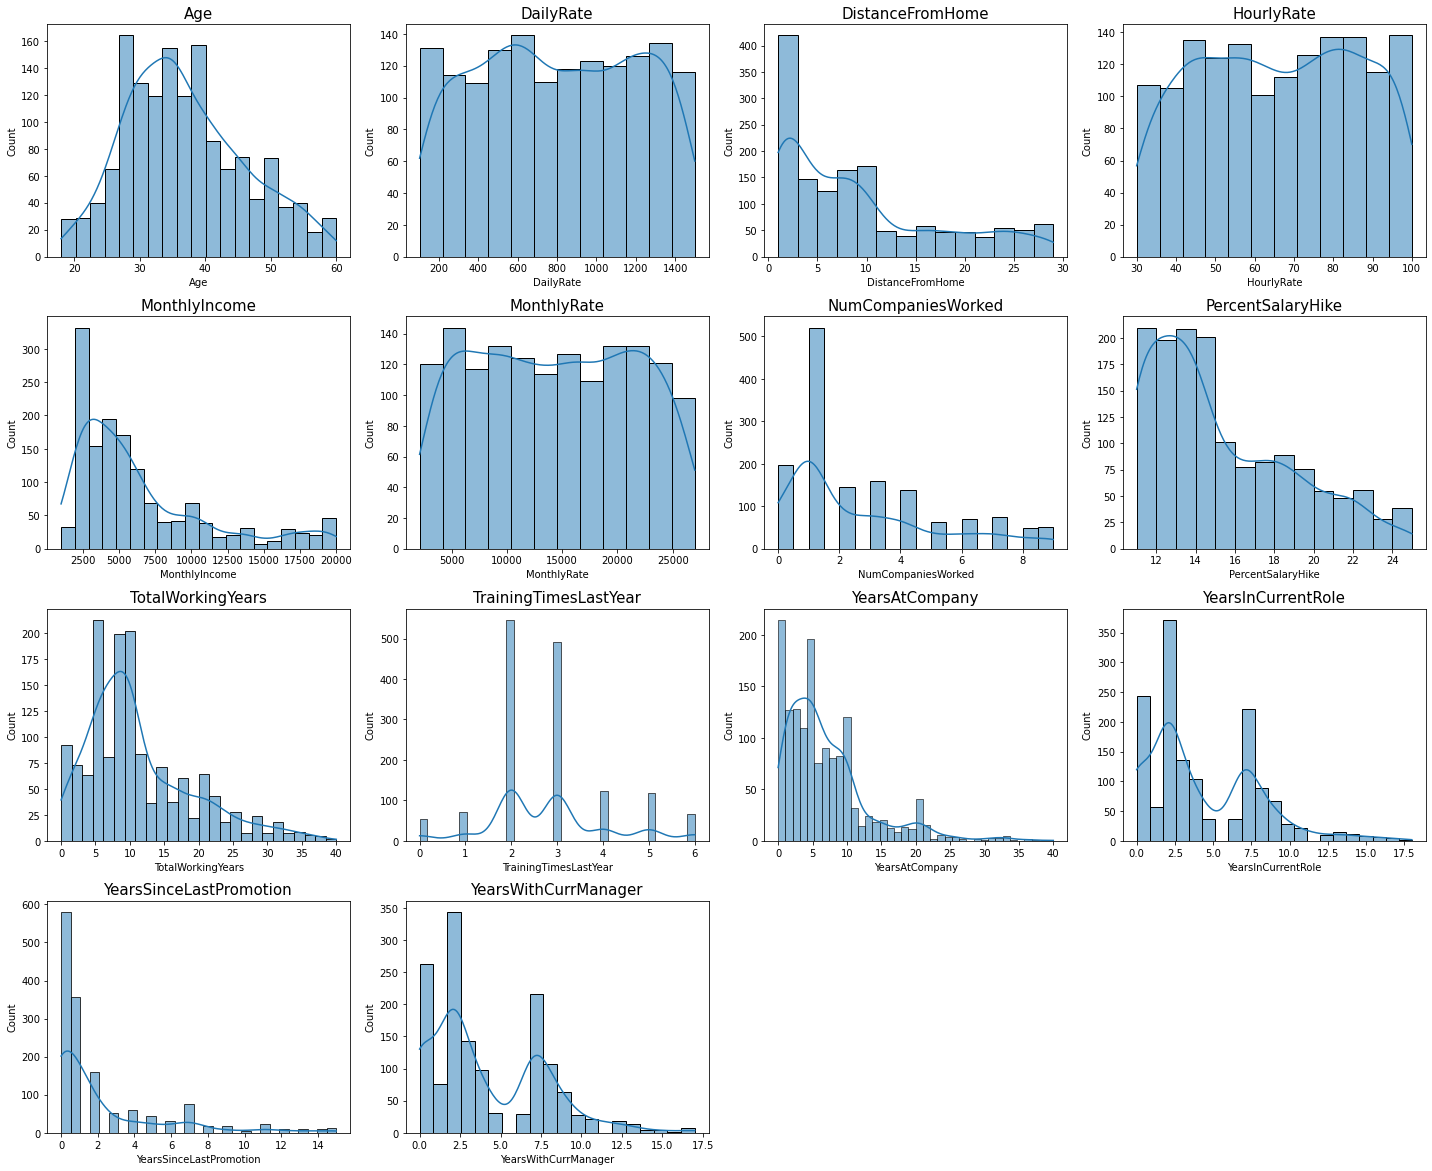

In [12]:
cols = list(df_numeric)
plt.figure(figsize = (20, 20))
for i in range(len(cols)):
    plt.subplot(len(cols)//3+1, 4, i + 1)
    sns.histplot(df_numeric[cols[i]], kde=True)
    plt.title(cols[i], fontsize = 15)
    
plt.tight_layout()
plt.show()

Analisis terhadap skewness dilakukan pada data numerik yang bukan kategorik untuk melihat distribusi sebaran atas

Terdapat beberapa catatan terhadap informasi sebaran data diatas : 
> Beberapa data memiliki kecenderungan skewness ke satu sisi diantaranya MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion. Akan dilakukan analisis lebih lanjut hubungan data tersebut.

## Total waktu bekerja antar Gender

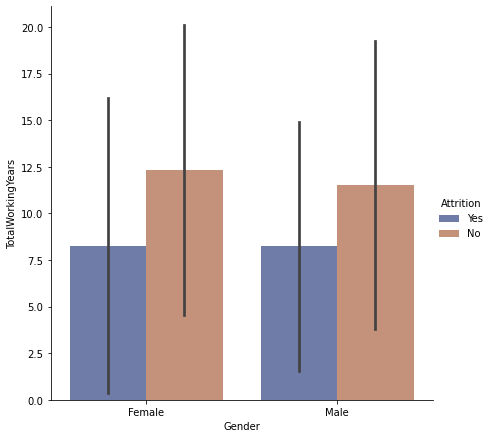

In [13]:
sns.catplot(
    data=df, kind="bar",
    x="Gender", y="TotalWorkingYears", hue="Attrition",
    ci="sd", palette="dark", alpha=.6, height=6)

* Attrition berada pada level yang sama antar gender dan merata pada Total working years antar karyawan
* Karyawan yang memiliki Total Working Years yang tinggi cenderung Memiliki Attrition level yang rendah

## Percentage Salary Hike to Monthly Income

<Figure size 2160x2160 with 0 Axes>

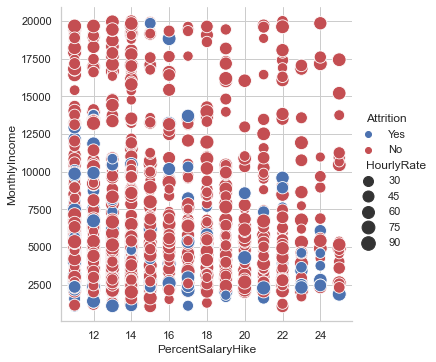

In [14]:
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize = (30, 30))
sns.relplot(
    data=df,
    x="PercentSalaryHike", y="MonthlyIncome",
    hue="Attrition", size="HourlyRate",
    palette=["b", "r"], sizes=(100, 200))

Terdapat beberapa point menarik pada grafik diatas
1. Attrition sebagian besar terjadi pada karyawan yang memiliki salary rendah
2. Monthly income tidak selalu berbanding lurus dengan HourlyRate
3. Sebagian besar karyawan memiliki salary hike yg rendah, terlihat adanya sebagian attrition yang berpusat pada karywan dengan posisi Percentsalary hike tinggi dengan monthly income rendah 

## Pengaruh Overtime terhadap Attrition Level

<AxesSubplot:xlabel='OverTime', ylabel='DistanceFromHome'>

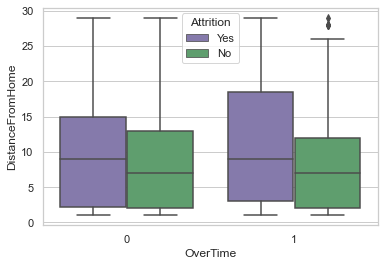

In [15]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
df['OverTime'] = enc.fit_transform(df['OverTime'])
sns.boxplot(x="OverTime", y="DistanceFromHome",
            hue="Attrition", palette=["m", "g"],
            data=df)

Terdapat insight menarik pada grafik diats : 
* Karyawan yang melakukan overtime dengan Distance From Home yang lebih jauh memiliki kecenderungan Attrition lebih tinggi
* Terdapat outlier pada karyawan yg memiliki jarak rumah lebih jauh namun tidak memiliki kecenderungan attrition

### Posisi dengan Overtime yang paling banyak dan kaitannya dengan Attrition

<AxesSubplot:xlabel='JobRole', ylabel='MonthlyIncome'>

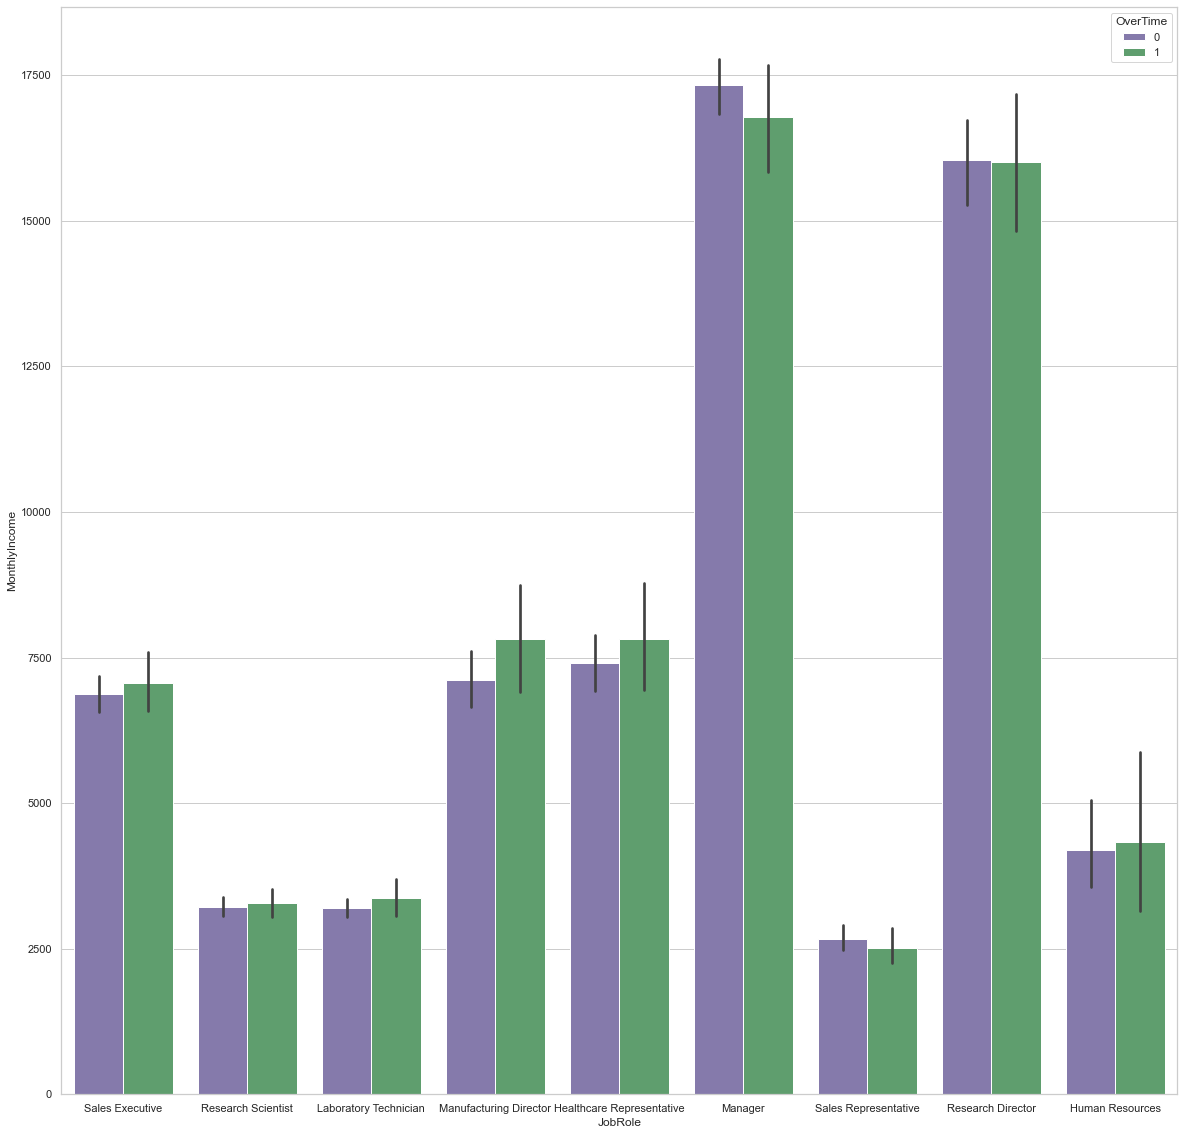

In [16]:
fig = plt.figure(figsize = (20, 20))

df['OverTime'] = enc.fit_transform(df['OverTime'])
sns.barplot(x="JobRole", y="MonthlyIncome",
            hue="OverTime", palette=["m", "g"],
            data=df)

<AxesSubplot:xlabel='JobRole', ylabel='MonthlyIncome'>

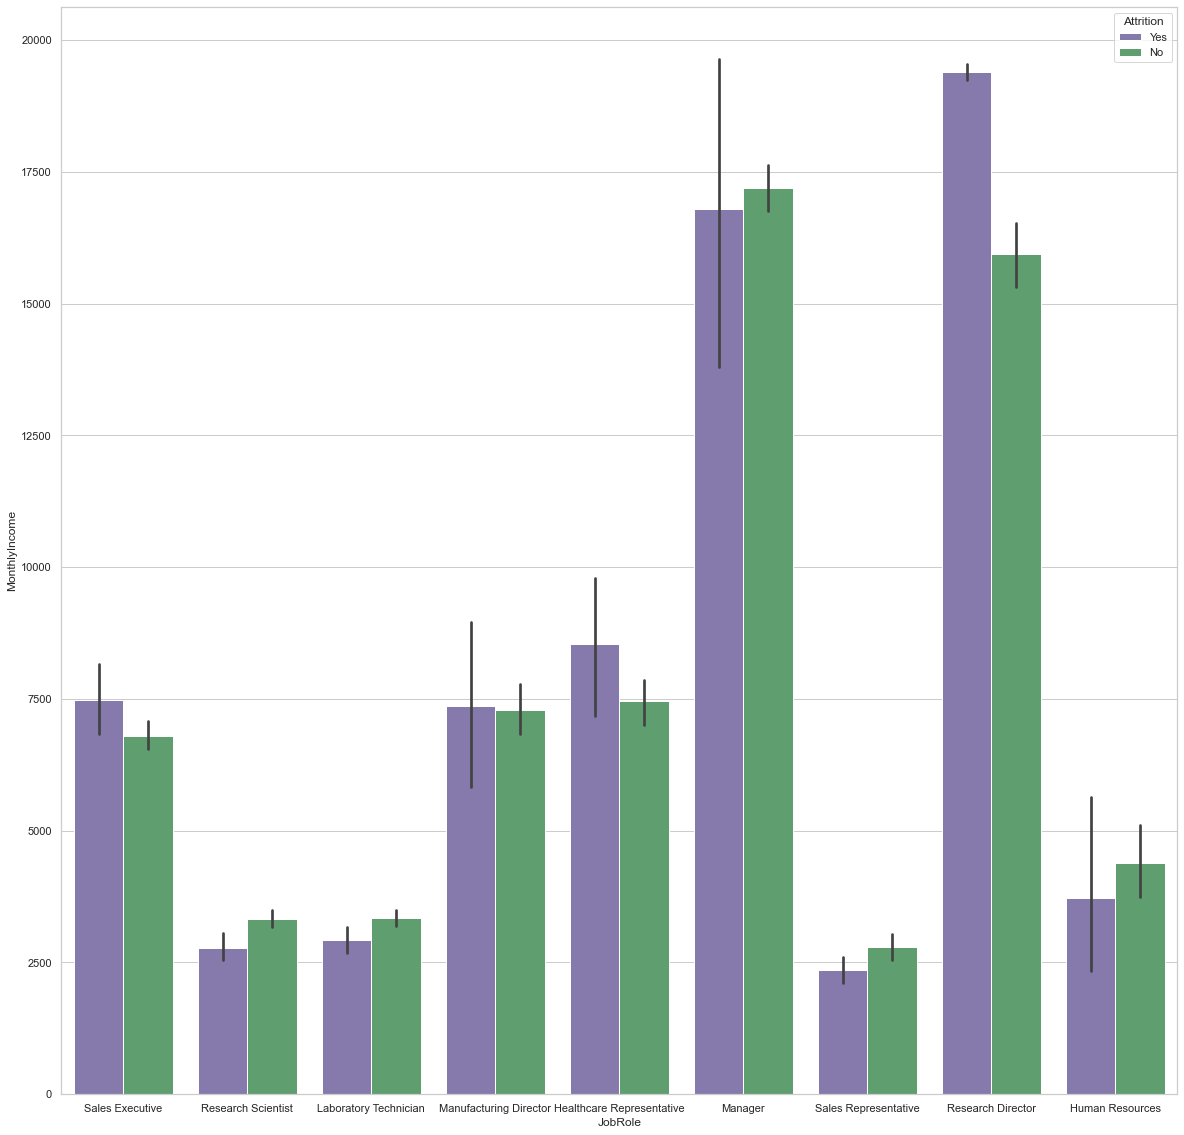

In [17]:
fig = plt.figure(figsize = (20, 20))

df['OverTime'] = enc.fit_transform(df['OverTime'])
sns.barplot(x="JobRole", y="MonthlyIncome",
            hue="Attrition", palette=["m", "g"],
            data=df)

Terlihat pada 2 diagram diatas, Posisi Research Director, Manager dan Sales Executive dengan total Overtime terbanyak berbanding lurus dengan total Attrition pada masing masing jobrole, monthly income sebagai dugaan awal untuk kompensasi atas overtime ternyata tidak memberikan dampak positive terhadap level of attrition dari masing masing Job Role 

### Pengaruh Job Satisfaction & Environmental Satisfaction terhadap Attrition level sebuah posisi

<AxesSubplot:xlabel='JobRole', ylabel='EnvironmentSatisfaction'>

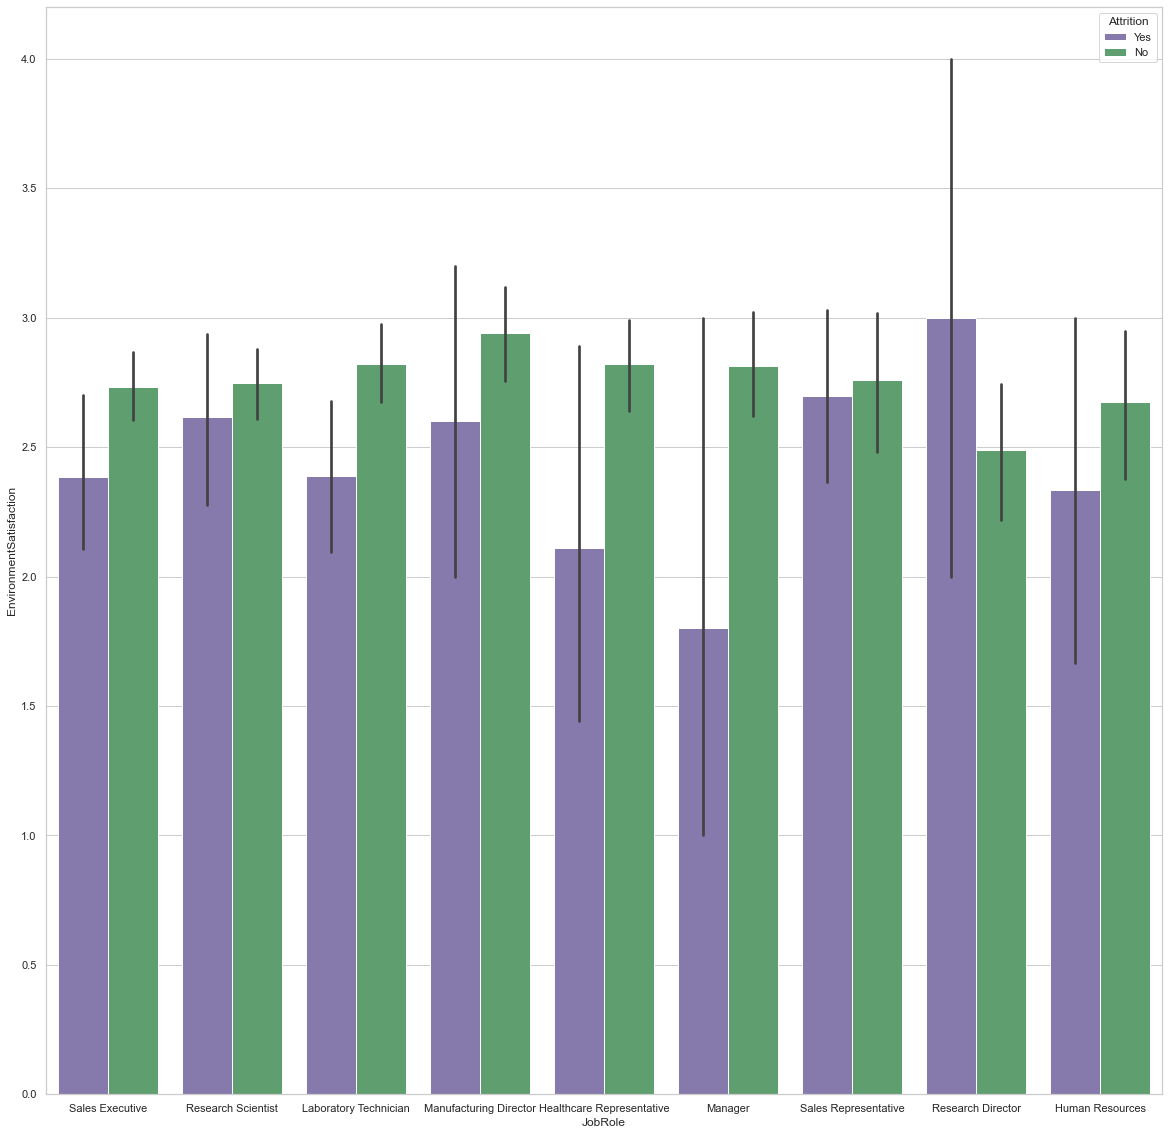

In [18]:
fig = plt.figure(figsize = (20, 20))

sns.barplot(x="JobRole", y="EnvironmentSatisfaction",
            hue="Attrition", palette=["m", "g"],
            data=df)

<AxesSubplot:xlabel='JobRole', ylabel='JobSatisfaction'>

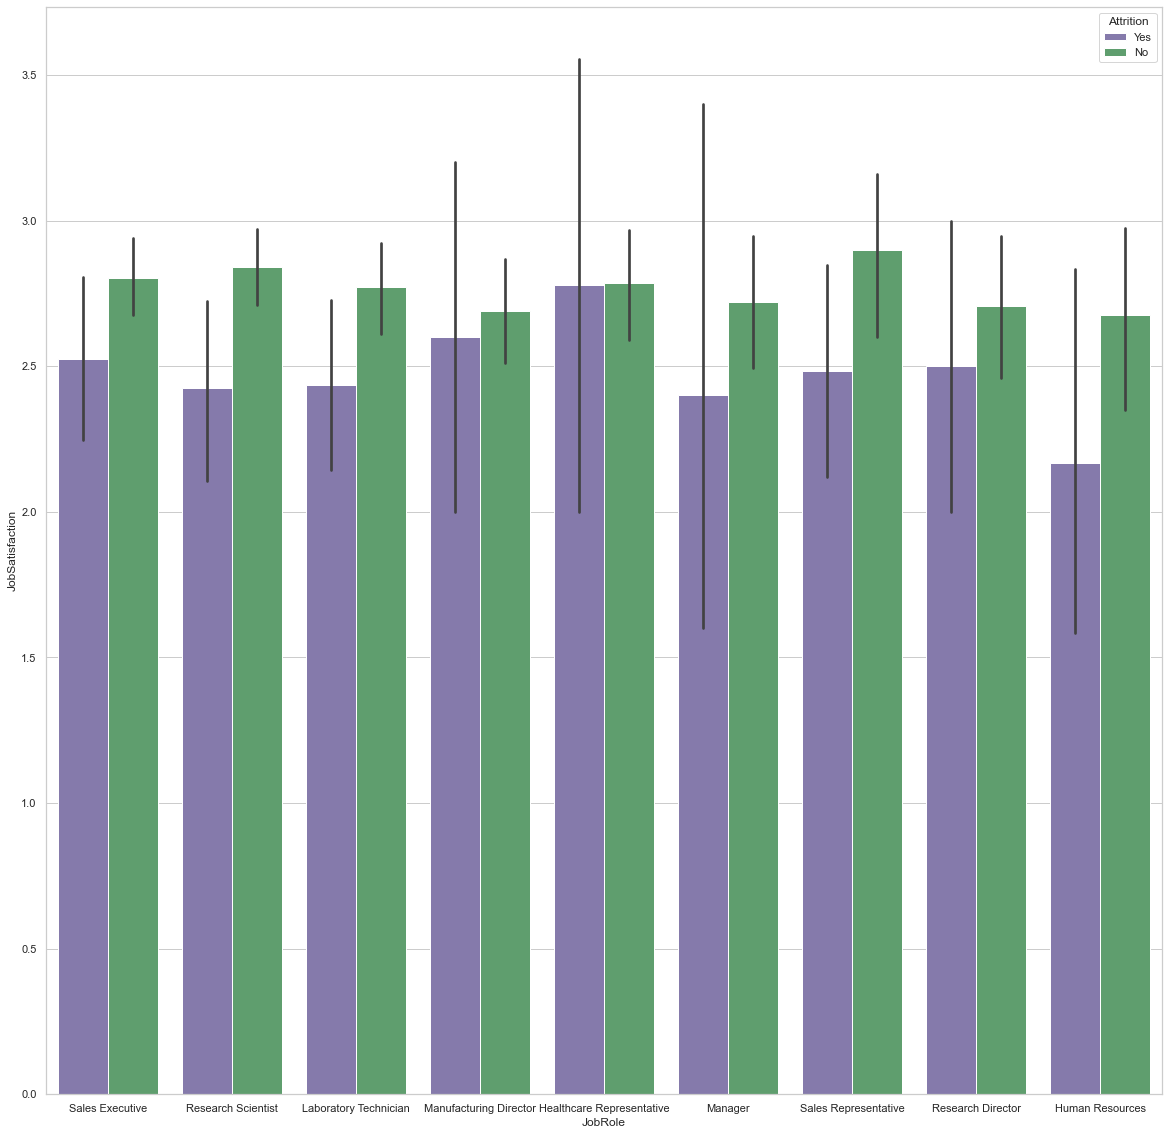

In [19]:
fig = plt.figure(figsize = (20, 20))

sns.barplot(x="JobRole", y="JobSatisfaction",
            hue="Attrition", palette=["m", "g"],
            data=df)

Jika 2 diagram diatas maka didapat informasi sebagai berikut atas 3 Job :
* Research director memiliki kepuasan terhadap Job yg tinggi namun Environmental satisfaction yg rendah untuk Attrition Yes
* sales representatif juga memiliki kecenderungan yang sama namun dengan angka rata rata pada attrition No yang lebih tinggi
* Sales executive tidak memiliki informasi yang berarti

## Other benefit to Attrition by Job Role

<AxesSubplot:xlabel='JobRole', ylabel='StockOptionLevel'>

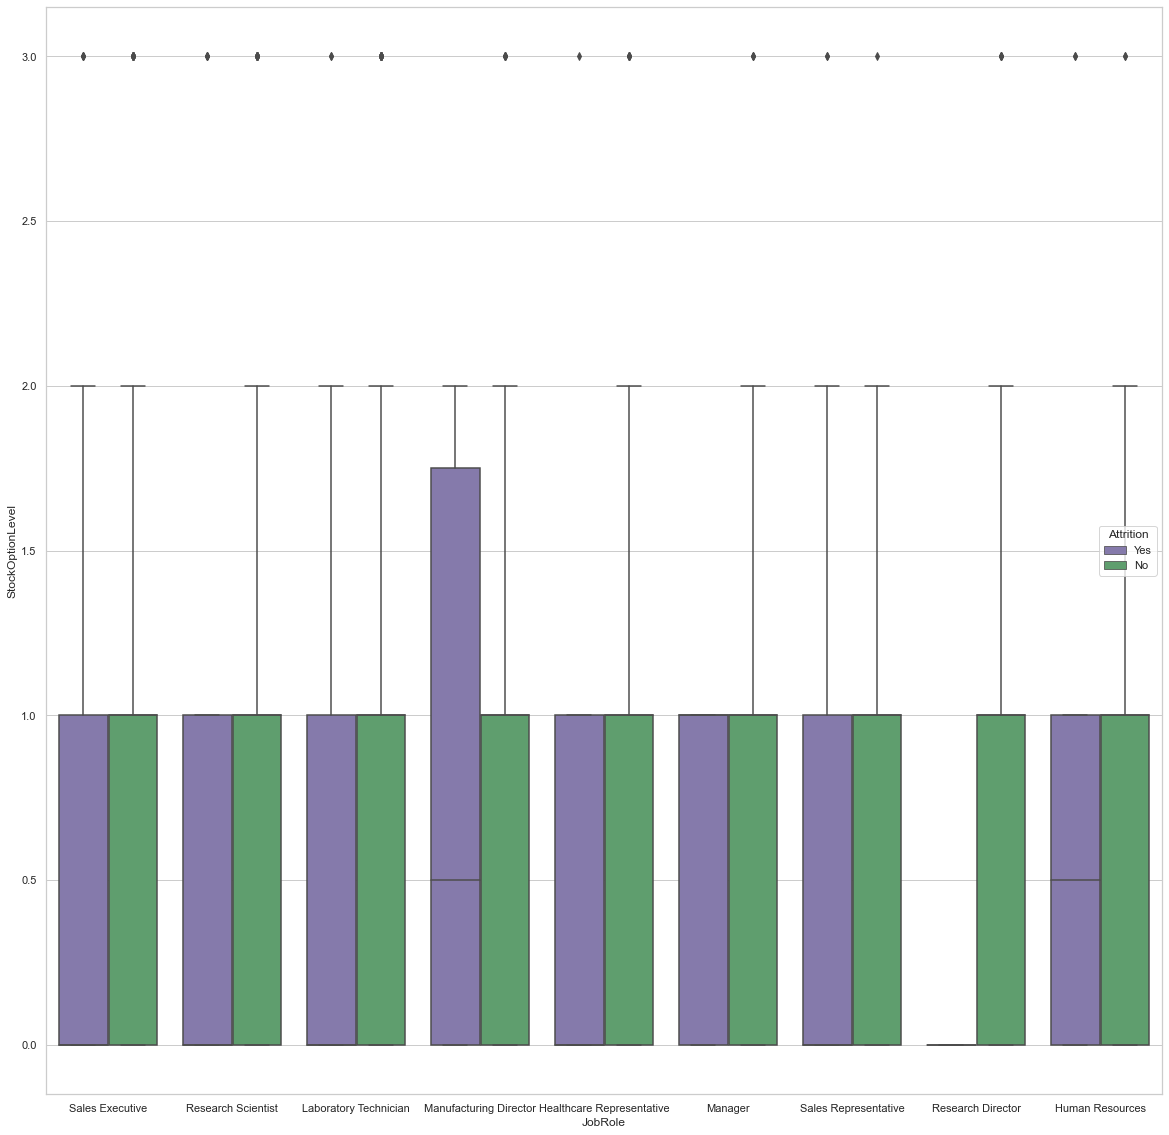

In [20]:
fig = plt.figure(figsize = (20, 20))

sns.boxplot(x="JobRole", y="StockOptionLevel",
            hue="Attrition", palette=["m", "g"],
            data=df)

Other benefit yang diterima oleh Jobrole tertinggi di pegang oleh Manufacturing director, Research Director tidak mendapatkan StockOption sama sekali untuk yang telah melakukan Attrition

# Data Preprocessing

## Encode dengan Get_Dummies

In [21]:
df_dummies = pd.get_dummies(data=df, columns=['BusinessTravel', 'Department', 'EducationField','Gender','JobRole','MaritalStatus','OverTime'])

## Encode With Label Encoder

In [22]:
df_dummies['Attrition'] = enc.fit_transform(df['Attrition'])


In [23]:
df_dummies.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_0,OverTime_1
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0


## Multicolinearity Test

In [24]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   DailyRate                1470 non-null   int64
 2   DistanceFromHome         1470 non-null   int64
 3   HourlyRate               1470 non-null   int64
 4   MonthlyIncome            1470 non-null   int64
 5   MonthlyRate              1470 non-null   int64
 6   NumCompaniesWorked       1470 non-null   int64
 7   PercentSalaryHike        1470 non-null   int64
 8   TotalWorkingYears        1470 non-null   int64
 9   TrainingTimesLastYear    1470 non-null   int64
 10  YearsAtCompany           1470 non-null   int64
 11  YearsInCurrentRole       1470 non-null   int64
 12  YearsSinceLastPromotion  1470 non-null   int64
 13  YearsWithCurrManager     1470 non-null   int64
dtypes: int64(14)
memory usage: 160.9 KB


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(len(df_numeric.columns))]
vif_data

,feature,VIF
0,Age,25.496860
1,DailyRate,4.721572
2,DistanceFromHome,2.271398
3,HourlyRate,9.767720
4,MonthlyIncome,7.286833
5,MonthlyRate,4.737393
6,NumCompaniesWorked,2.675998
7,PercentSalaryHike,13.578688
8,TotalWorkingYears,13.311109
9,TrainingTimesLastYear,5.302141


## PCA

In [26]:
# scale the DataFrame
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_PCA_scalled=scaler.fit_transform(df_numeric)

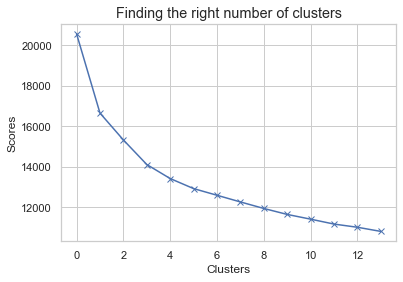

In [27]:
from sklearn.cluster import KMeans

scores_1 = []

range_values = range(1,15)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_PCA_scalled)
    scores_1.append(kmeans.inertia_)
plt.plot(scores_1, 'bx-')
plt.style.use('ggplot')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

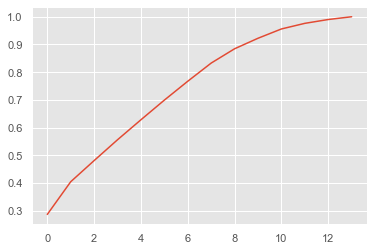

In [28]:
from sklearn.decomposition import PCA
pca=PCA(whiten=True)
pca.fit(df_PCA_scalled)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumsum)

berdasarkan kombinasi antara inertia skor cluster diatas dan grafik explained variance ratio, maka dipilih 6 komponen sebagai total reduksi dari 13 feature yang tergabugn didalam df_numerik

In [29]:
np.sum(pca.explained_variance_ratio_)

1.0

In [30]:
X2D=PCA(n_components=6).fit_transform(df_PCA_scalled)
df_PCA_final=pd.DataFrame(data=X2D,columns=["num1","num2", "num3", "num4", "num5", "num6"])
df_PCA_final.head()

,num1,num2,num3,num4,num5,num6
0,-0.243127,1.805911,0.310523,-0.385125,-2.017644,-0.985129
1,0.854579,-0.381203,0.525418,1.609193,1.593286,0.482030
2,-2.199023,1.413783,0.058248,-2.597685,-0.602447,0.023239
3,-0.571040,-0.682526,-0.953403,-0.112556,-0.014426,0.415376
4,-1.568219,0.965767,-1.643331,0.537230,0.070340,-0.940880


## Penggabungan hasil Reduksi Dimensi dengann Dataset

In [31]:
df_dummies = df_dummies.drop(['Age','DailyRate','DistanceFromHome', 'HourlyRate','MonthlyIncome','MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager'], axis=1)

In [32]:
df_final = pd.merge(df_dummies, df_PCA_final, left_index=True, right_index=True)

In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Attrition                          1470 non-null   int32  
 1   Education                          1470 non-null   int64  
 2   EnvironmentSatisfaction            1470 non-null   int64  
 3   JobInvolvement                     1470 non-null   int64  
 4   JobLevel                           1470 non-null   int64  
 5   JobSatisfaction                    1470 non-null   int64  
 6   PerformanceRating                  1470 non-null   int64  
 7   RelationshipSatisfaction           1470 non-null   int64  
 8   StockOptionLevel                   1470 non-null   int64  
 9   WorkLifeBalance                    1470 non-null   int64  
 10  BusinessTravel_Non-Travel          1470 non-null   uint8  
 11  BusinessTravel_Travel_Frequently   1470 non-null   uint8

## Feature Selection With Random Forest

## Assigning X & Y

In [34]:
scaler_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

scaler=StandardScaler()
scaler_pipeline.fit(df_final)

X=df_final.drop(['Attrition'], axis=1)
y=df_final['Attrition']
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.3,random_state=9)

## Joblib Scaler 

In [36]:
import pickle

with open('model/scaler_std.pkl', 'wb') as f:
    pickle.dump(scaler, f)

Joblib Scaler untuk proses model deployment

### Fit To random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train1, y_train1)

SelectFromModel(estimator=RandomForestClassifier())

In [38]:
selected_feat= X_train1.columns[(sel.get_support())]
len(selected_feat)
print('Feature yang terpilih', (selected_feat.tolist()))

Feature yang terpilih ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'OverTime_0', 'OverTime_1', 'num1', 'num2', 'num3', 'num4', 'num5', 'num6']


## Visualisasi Hasil

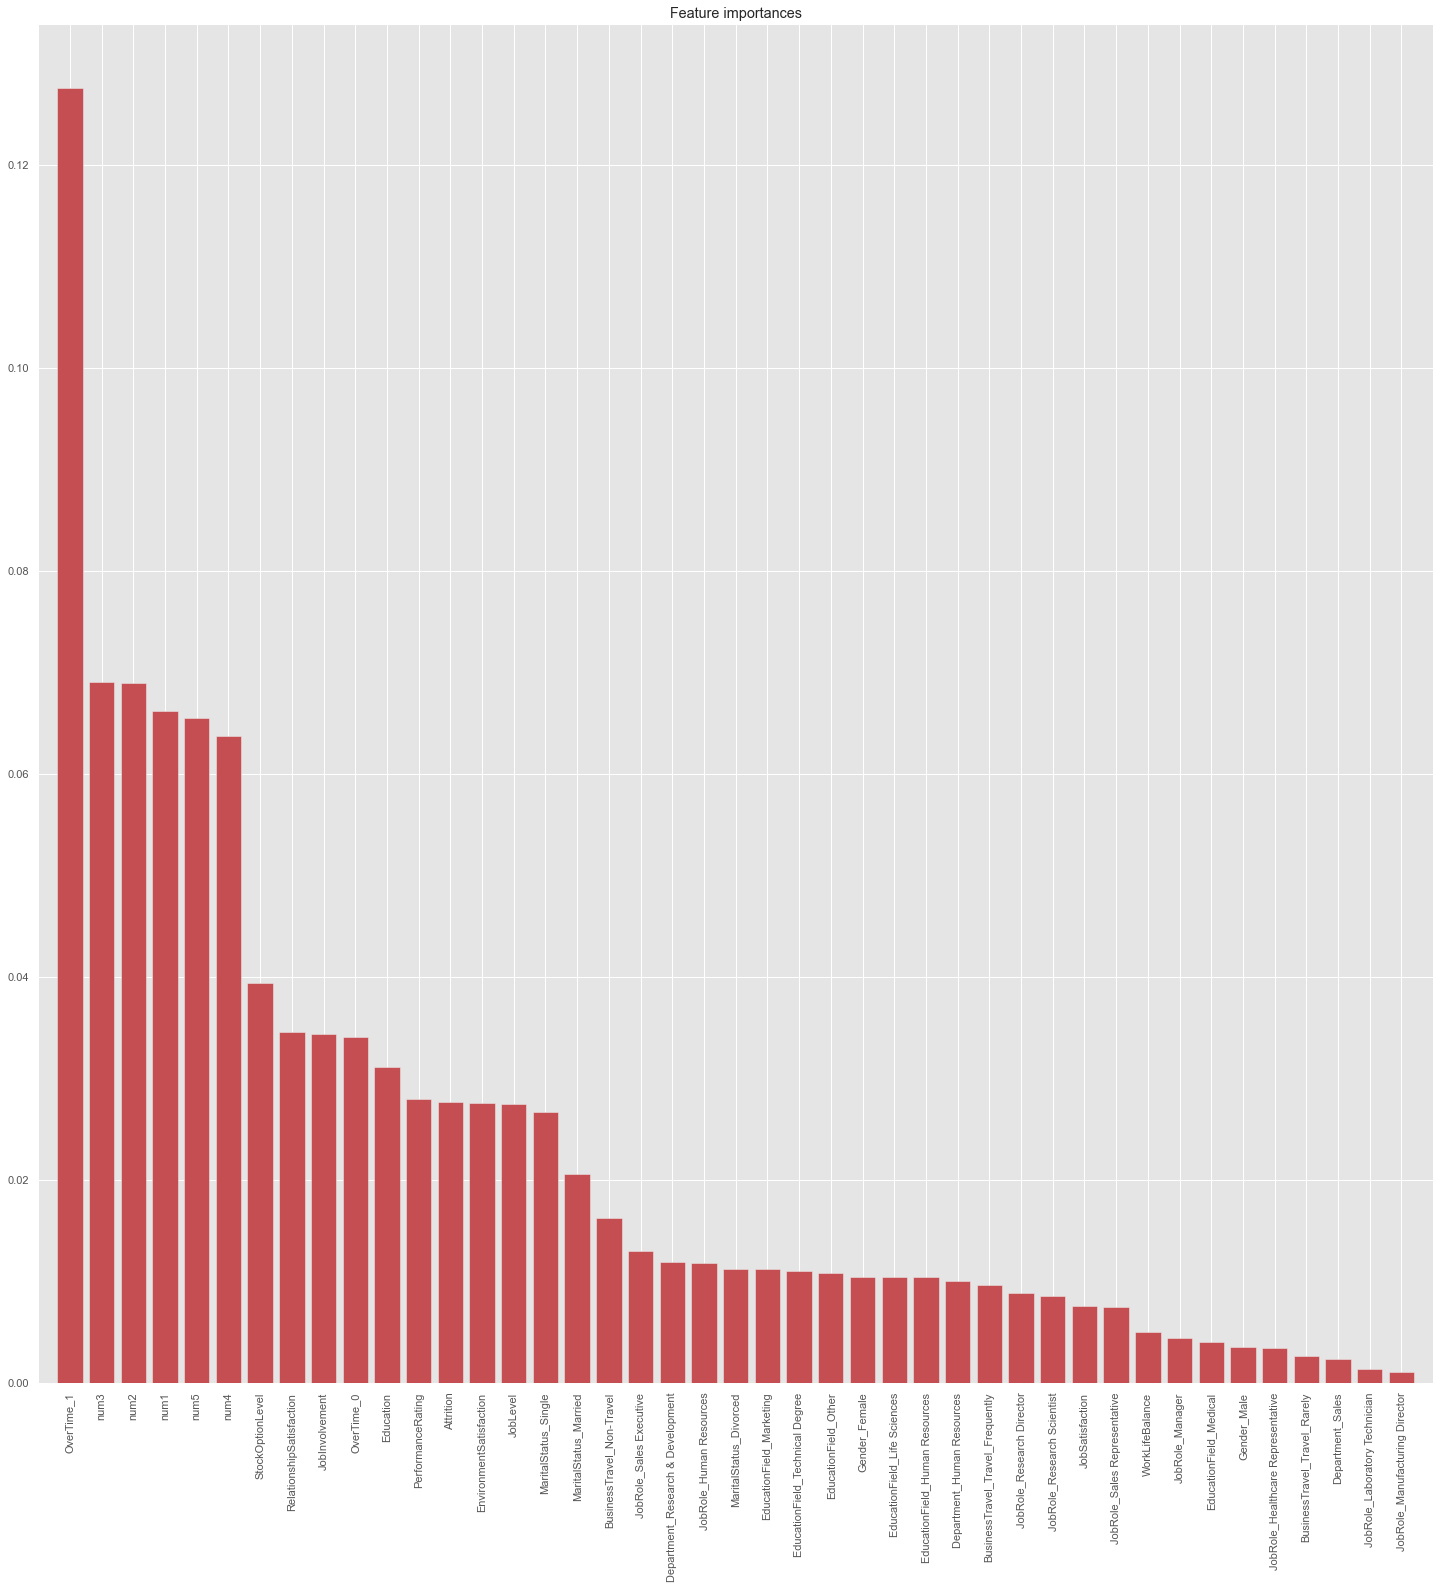

In [39]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure(figsize = (25, 25))
plt.title("Feature importances")
plt.bar(range(X_train1.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train1.shape[1]), df_final.columns[indices], rotation=90)
plt.xlim([-1, X_train1.shape[1]])
plt.show()

In [40]:
df_final['Attrition'].unique()

array([1, 0])

## Assign train & Test

In [41]:
X=df_final.drop(['Attrition'], axis=1)
y=df_final['Attrition']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, stratify=y ,random_state=42)

## Oversampling

<AxesSubplot:>

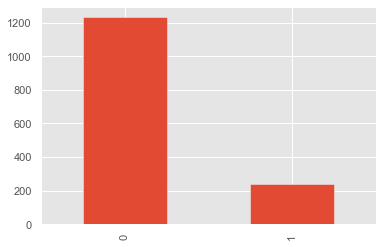

In [42]:
df_final['Attrition'].value_counts().plot(kind='bar')

In [43]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [44]:
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[  0 863]
 [  1 863]]


In [45]:
X_train.shape

(1726, 43)

# Pendefinisian Model

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Baseline Model pipeline

In [47]:
from sklearn import pipeline, metrics

base_LogR = pipeline.make_pipeline(preprocessing.StandardScaler(), LogisticRegression(C=0.1, random_state=1))
base_SVC = pipeline.make_pipeline(preprocessing.StandardScaler(), SVC(C=0.1, random_state=1))
base_DF = pipeline.make_pipeline(preprocessing.StandardScaler(), DecisionTreeClassifier(max_depth=4))
base_RF = pipeline.make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier(n_estimators=50, max_depth=4))
base_KNN = pipeline.make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(metric='euclidean'))

### Logistic Regression fit & metric report



In [48]:
base_LogR.fit(X_train, y_train)
print(metrics.classification_report(y_test, base_LogR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       370
           1       0.58      0.41      0.48        71

    accuracy                           0.86       441
   macro avg       0.74      0.68      0.70       441
weighted avg       0.84      0.86      0.85       441



### SVC fit & metric report

In [49]:
base_SVC.fit(X_train, y_train)
print(metrics.classification_report(y_test, base_SVC.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       370
           1       0.59      0.23      0.33        71

    accuracy                           0.85       441
   macro avg       0.73      0.60      0.62       441
weighted avg       0.82      0.85      0.82       441



### DF fit & metric report

In [50]:
base_DF.fit(X_train, y_train)
print(metrics.classification_report(y_test, base_DF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       370
           1       0.38      0.61      0.47        71

    accuracy                           0.78       441
   macro avg       0.65      0.71      0.66       441
weighted avg       0.83      0.78      0.80       441



### RF fit & metric report

In [51]:
base_RF.fit(X_train, y_train)
print(metrics.classification_report(y_test, base_RF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       370
           1       0.49      0.46      0.48        71

    accuracy                           0.84       441
   macro avg       0.70      0.69      0.69       441
weighted avg       0.83      0.84      0.83       441



### KNN fit & metric feport

In [52]:
base_KNN.fit(X_train, y_train)
print(metrics.classification_report(y_test, base_KNN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       370
           1       0.32      0.27      0.29        71

    accuracy                           0.79       441
   macro avg       0.59      0.58      0.58       441
weighted avg       0.78      0.79      0.78       441



Model diatas merupakan base model dengan menggunakan hyper parameter default atau hyperparameter yagn ditentukan secara acak dengan menggunakan pipeline

## GridSearch For Model Tuning

In [53]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, cross_val_predict


params=[
    {'penalty':['l1','l2'],'solver':['newton-cg','lbfgs'], "class_weight":['balanced', 'balanced_subsample']},
    {'C':[0.1,0.5,1,1.5],'kernel':['rbf','sigmoid','linear'], "class_weight":['balanced', 'balanced_subsample']},
    {'max_depth':[4,5], "class_weight":['balanced', 'balanced_subsample']},
    {'n_estimators':[50,100],'max_depth':[4,5,6], 'criterion' :['gini', 'entropy'], 'max_features' :['auto', 'sqrt', 'log2'], "class_weight":['balanced', 'balanced_subsample']},
    {'weights':['uniform','distance'],'metric':['euclidean','minkowski']}
    
]

grid=[
    GridSearchCV(LogisticRegression(),params[0],scoring='accuracy',cv=5,n_jobs=10),
    GridSearchCV(SVC(),params[1],scoring='accuracy',cv=5,n_jobs=10),
    GridSearchCV(DecisionTreeClassifier(),params[2],scoring='accuracy',cv=5,n_jobs=10),
    GridSearchCV(RandomForestClassifier(),params[3],scoring='accuracy',cv=5,n_jobs=10),
    GridSearchCV(KNeighborsClassifier(),params[4],scoring='accuracy',cv=5,n_jobs=10),
]

for g in grid:
    g.fit(X_train,y_train)

C:\Users\arryp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.89124738 0.89124738        nan        nan
 0.89124738 0.89124738]
  warnings.warn(
C:\Users\arryp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.8523247  0.63152718 0.88314149        nan        nan        nan
 0.88597805 0.61010807 0.87853397        nan        nan        nan
 0.89064254 0.57360308 0.88085616        nan        nan        nan
 0.89586328 0.55389796 0.88085449        nan        nan        nan]
  warnings.warn(
C:\Users\arryp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.81117701 0.82684259        nan        nan]
  warnings.warn(


In [54]:
models=[
    LogisticRegression(penalty=grid[0].best_params_['penalty'],solver=grid[0].best_params_['solver'],class_weight=grid[0].best_params_['class_weight'],fit_intercept=True),
    SVC(C=grid[1].best_params_['C'],kernel=grid[1].best_params_['kernel'],class_weight=grid[1].best_params_['class_weight'],probability=True),
    DecisionTreeClassifier(max_depth=grid[2].best_params_['max_depth'], class_weight=grid[2].best_params_['class_weight']),
    RandomForestClassifier(n_estimators=grid[3].best_params_['n_estimators'],max_depth=grid[3].best_params_['max_depth'], criterion=grid[3].best_params_['criterion'],max_features=grid[3].best_params_['max_features'], class_weight=grid[3].best_params_['class_weight']),
    KNeighborsClassifier(weights=grid[4].best_params_['weights'],metric=grid[4].best_params_['metric']),
    GaussianNB(),
    ]
   
for mod in models:
    mod.fit(X_train,y_train)
    

In [55]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score,roc_auc_score,roc_curve,accuracy_score
import matplotlib.pyplot as plt

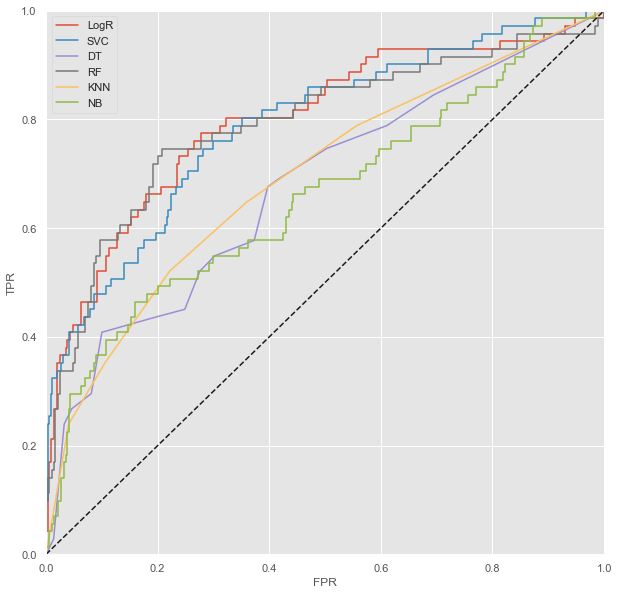

In [56]:
y_pred1=[mod.predict(X_test) for mod in models]
scores1=[mod.predict_proba(X_test)[:,1] for mod in models]
curve=[[roc_curve(y_test,score,pos_label=1)[0],roc_curve(y_test,score,pos_label=1)[1]] for score in scores1]

class_report=pd.DataFrame(index=['precision','recall','f1','support'])
mod_ls=['LogR','SVC','DT','RF','KNN','NB']
for i,pred in enumerate(y_pred1):
    metric=np.array(precision_recall_fscore_support(y_test,pred))
    for j,lbl in enumerate(set(df_final['Attrition'].unique())):
        class_report['{}_{}'.format(mod_ls[i],lbl)]=metric[:,j]

fig,ax=plt.subplots(figsize=(10,10))
for i in range(len(models)):
    ax.plot(curve[i][0],curve[i][1],label='{}'.format(mod_ls[i]))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.axis([0,1,0,1])
ax.legend()

In [57]:
class_report.transpose()

,precision,recall,f1,support
LogR_0,0.894330,0.937838,0.915567,370.0
LogR_1,0.566038,0.422535,0.483871,71.0
SVC_0,0.893401,0.951351,0.921466,370.0
SVC_1,0.617021,0.408451,0.491525,71.0
DT_0,0.888000,0.900000,0.893960,370.0
DT_1,0.439394,0.408451,0.423358,71.0
RF_0,0.895288,0.924324,0.909574,370.0
RF_1,0.525424,0.436620,0.476923,71.0
KNN_0,0.894410,0.778378,0.832370,370.0
KNN_1,0.310924,0.521127,0.389474,71.0


In [58]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Attrition                          1470 non-null   int32
 1   Education                          1470 non-null   int64
 2   EnvironmentSatisfaction            1470 non-null   int64
 3   JobInvolvement                     1470 non-null   int64
 4   JobLevel                           1470 non-null   int64
 5   JobSatisfaction                    1470 non-null   int64
 6   PerformanceRating                  1470 non-null   int64
 7   RelationshipSatisfaction           1470 non-null   int64
 8   StockOptionLevel                   1470 non-null   int64
 9   WorkLifeBalance                    1470 non-null   int64
 10  BusinessTravel_Non-Travel          1470 non-null   uint8
 11  BusinessTravel_Travel_Frequently   1470 non-null   uint8
 12  BusinessTravel_Trave

# Model Saving

In [59]:
import pickle

with open('model/RF.pkl', 'wb') as f:
    pickle.dump(grid[3], f)

In [60]:
pickle.load(open("model/RF.pkl", "rb"))

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [61]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Attrition                          1470 non-null   int32
 1   Education                          1470 non-null   int64
 2   EnvironmentSatisfaction            1470 non-null   int64
 3   JobInvolvement                     1470 non-null   int64
 4   JobLevel                           1470 non-null   int64
 5   JobSatisfaction                    1470 non-null   int64
 6   PerformanceRating                  1470 non-null   int64
 7   RelationshipSatisfaction           1470 non-null   int64
 8   StockOptionLevel                   1470 non-null   int64
 9   WorkLifeBalance                    1470 non-null   int64
 10  BusinessTravel_Non-Travel          1470 non-null   uint8
 11  BusinessTravel_Travel_Frequently   1470 non-null   uint8
 12  BusinessTravel_Trave

# Model Inference

In [63]:
df_inference = pd.read_csv('data/inference.csv')

In [64]:
models[3]

RandomForestClassifier(class_weight='balanced', max_depth=6)

In [65]:
models[3].predict(df_inference)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

diantara 15 data inference yang dimasukkan kedalam model terpilih yaitu random forest, 4 diantaranya memiliki hasil 1 (Attrition) dan 11 diantaranya adalah Not Attrition

# Kesimpulan

## Hasil EDA

<ul>
    <li>Overtime merupakan penyumbang terbesar didalam proses Attrition, dimana karyawan yang memiliki jumlah overtime yes pada posisi tertentu cenderung untuk sulit dilakukan rehire ketika karyawan tersebut resign pada posisi yang kosong.</li>
    <li>Job Research Director, Manager dan Sales Executive sebagai pemilik level attrition terbesar harus diperhatikan lebih lanjut untuk menekan angka attrition pada posisi tersebut, Montlhly income yang besar dinilai tidak cukup berhasil digunakan sebagai kompensasi utama atas tingginya angka overtime.</li>
    <li>Overtime merupakan sesuatu yang tidak dapat dihindari pada posisi pekerjaan tertentu, dengan beban kerja standar 80 jam dinilai kurang untuk menyelesaikan pekerjaan. beberapa tindakan yang dapat diambil berdasarkan pergerakan data</li>
    <ul>
        <li> posisi research director memiliki Job Satisfaction yang tinggi namun Environmental Satisfaction yang rendah , hal tersebut menandakan adanya perbaikan Environmental Job pada posisi tersebut</li>
        <li>Research Director juga dinilai perlu untuk mendapatkan peningkatan StockOptionLevel sebagai kompensasi benefit lainnya atas beban kerja yang tinggi jika dilihat dari OverTime</li>
    </li>
    </ul>
<li>Perlu adanya treatment khusus pada masing masing departement untuk menekan tingginya angka Attrition khususnya pada posisi JobLevel Job Involvement yang tinggi, dengan menggunakan pendekatan lainnya seperti penambahan stock option, pelaksanaan tour of duty ketika tahun tertentu di Perusahaan, fasilitas untuk mempermudah akses menuju kantor (DistanceFromHome) atau pengurangan overtime sebagai feature yang paling mempengaruhi seseorang keluar dari posisinya</li>
</ul>

## Hasil Model Analysist

> # Random Forest yang terpilih

## Model Terpilih :
Sesuai dengan peruntukannya Random Forest merupakan salah satu model terbaik yang digunakan untuk menghadapi label imbalance dan data outlier. Random Forest memiliki pola pembentukan algoritma, yang melakukan pengambilan keputusan berdasarkan kumpulan kelompok dari "Decision Tree" yang dilanjutkan kepada tahapan selanjutnya hingga depth data mencapai batas yang telah ditentukan atau decision tree telah mencapai putusan paling akhir. Dari hasil perhitungan model yang dipilih pada Class 1 cenderung kecil dikarenakan pada tahapan training dilakukan upaya agar seluruh informasi dari Dataset masuk ke dalam model. Model akan berfungsi jauh lebih baik apabila dilakukan analisis lebih lanjut terhadap Pemilihan Feature menggunakan KBest dengan penetapan scoring threshold. Namun hal tersebut tidak dilakukan dengan harapan model bekerja dengan seluruh yang ada tanpa pengurangan feature dari dataset keseluruhan

## Proses lainnya : 
* Tahapan Parameter Tuning tidak memberikan dampak terlalu positif dikarenakan proses training menggunakan data dummy dengan proses resampling tanpa mengurangi fitur berdasarkan tingkat signifikansi terhadap model, hal tersebut mengakibatkan  model kurang siap menghadapi data imbalance dan dianggap gagal membaca pola berdasarkan tingkat pentingnya fitur.
* Model lainnya terutama KNN sangat dan Naive Bayes sangat gagal dalam menghadapi data imbalance, proses normalisasi data sangat diperlukan apabila ingin menggunakan model tersebut, namun pada proses ini tidak dilakukan 
